# Lab #3: Classification Using Decision Trees

## Data Loading

[Iris Flower Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper.

In [0]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data']
y = iris['target']

## Data Exploration
#### Features

In [0]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<a href="https://imgbb.com/"><img src="https://i.ibb.co/mDC1KSt/petal-sepal.png" alt="petal-sepal" border="0"></a>

#### Target Labels

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<a href="https://ibb.co/8sJhx0R"><img src="https://i.ibb.co/h9kqdyn/iris.png" alt="iris" border="0"></a>

#### Dataset Size

In [0]:
len(iris.data)

150

#### Visualizations

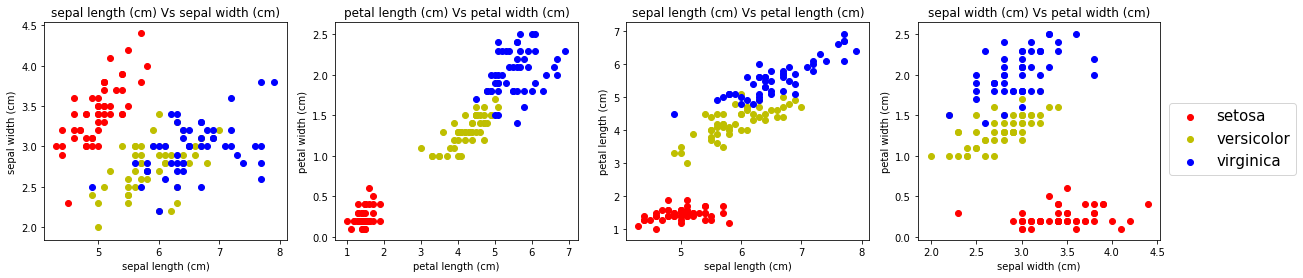

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

colors = ['r', 'y', 'b']
fig, ax = plt.subplots(1, 4, figsize=(20,4))
cols = [[0, 1], [2, 3], [0, 2], [1, 3]]

for n in range(len(ax)):
    for t in range(len(iris.target_names)):
        ax[n].scatter([iris.data[i, cols[n][0]] for i,v in enumerate(iris.target) if v==t], \
                [iris.data[i, cols[n][1]] for i,v in enumerate(iris.target) if v==t], c=colors[t])
    ax[n].set_title('{} Vs {}'.format(iris.feature_names[cols[n][0]], iris.feature_names[cols[n][1]]))
    ax[n].set_xlabel(iris.feature_names[cols[n][0]])
    ax[n].set_ylabel(iris.feature_names[cols[n][1]])

fig.legend(labels=['setosa', 'versicolor', 'virginica'], ncol=1, loc='right', fontsize=15)
plt.show()

## Modeling A Classifier

### See [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) docs for parameter list, attributes etc. 

The most "relevant" parameters:
* **criterion** : _The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Default is "gini"._

* **splitter** : _The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split. Default is "best"._

* **max_depth** : _The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Default is `None`._

* **min_samples_split** : _The minimum number of samples required to split an internal node. Default = `2`._

* **min_samples_leaf** : _The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least `min_samples_leaf` training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. Default is `1`_

## Train/Test The Data

In [0]:
from sklearn.model_selection import train_test_split

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

## Training

In [0]:
from sklearn import tree

# Parameters
criterion = 'gini'
splitter = 'best'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1

clf = tree.DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth,\
                                  min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
clf = clf.fit(X_train, y_train)

## Testing

In [0]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)
print("Accuracy is {}\n".format(accuracy_score(y_test, y_pred)*100))
print("Classification Report is:\n {}".format(classification_report(y_test, y_pred, target_names=iris.target_names)))

Accuracy is 96.66666666666667

Classification Report is:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.83      0.91         6
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



## Visualizing The Decision Tree Learnt

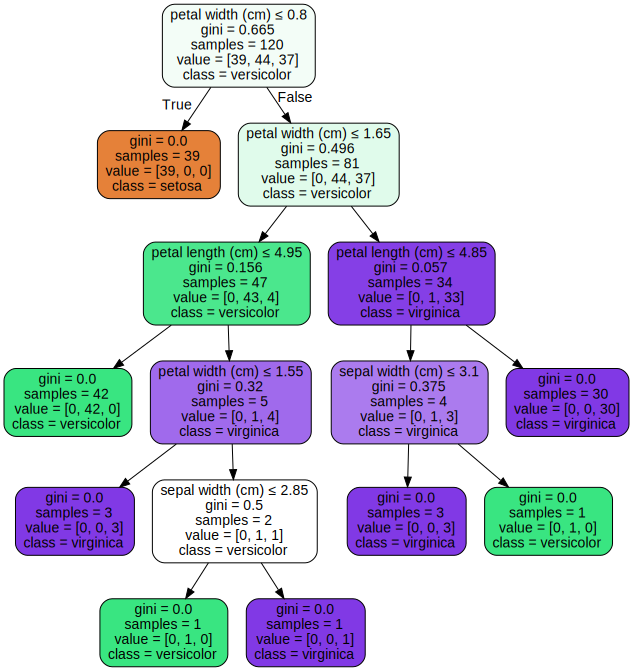

In [0]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Decision Boundary Visualization

Automatically created module for IPython interactive environment


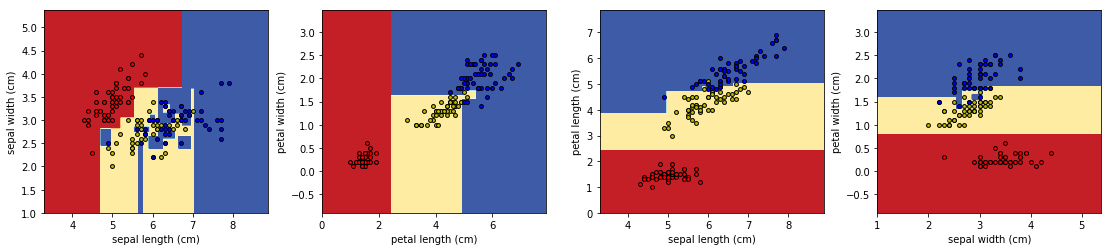

In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

# Hyper-parameters
criterion = 'entropy'

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
plt.figure(figsize=(16, 4))

for pairidx, pair in enumerate([[0, 1], [2, 3], [0, 2], [1, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    
    # Train
    clf = tree.DecisionTreeClassifier(criterion=criterion).fit(X, y)
    
    # Plot the decision boundary
    plt.subplot(1, 4, pairidx + 1)
    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

# Exercises

## Implement Gini-Index From Scratch

In this exercise, you will write a method that outputs Gini-index given a split of a toy dataset. 

### Visualizing The Toy-Data

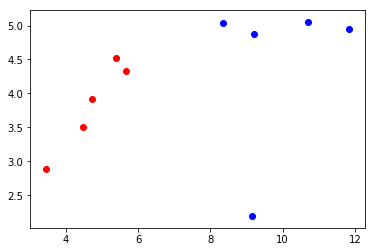

In [148]:
toy_data = [[4.484812507,3.4983517180,0],
            [3.442139098,2.883329202,0],
            [5.391887635,4.526381359,0],
            [5.674611146,4.333518109,0],
            [4.712776711,3.922582001,0],
            [9.211113656,4.876521335,1],
            [10.71577104,5.052614977,1],
            [9.158110115,2.190251164,1],
            [11.83850681,4.948118771,1],
            [8.355855140,5.033551554,1]]

import pandas as pd

toy_data_pd = pd.DataFrame(toy_data, columns=['x1', 'x2', 'class_id'])
plt.scatter(toy_data_pd.x1[toy_data_pd.class_id == 0], toy_data_pd.x2[toy_data_pd.class_id == 0], c='r')
plt.scatter(toy_data_pd.x1[toy_data_pd.class_id == 1], toy_data_pd.x2[toy_data_pd.class_id == 1], c='b')

`data_split` takes the dataset and splits it at provided `index` if data less than `value`.  

In [0]:
# A method that does the split
def data_split(index, value, dataset):
  left, right = list(), list()
  for row in dataset:
    if row[index] < value:
      left.append(row)
    else:
      right.append(row)
  return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
  sample_count = sum([len(group) for group in groups])
  gini_groups = []
  for group in groups:
    gini_group = 0.0
    group_size = len(group)
    for class_value in classes:
      if group_size == 0:
        continue
      proportion = [row[-1] for row in group].count(class_value) / \
                         float(group_size)
      gini_group += (proportion * (1.0 - proportion))
    partition_weight = group_size / sample_count
    gini_groups.append(partition_weight * gini_group)
  return sum(gini_groups)

# Select the best split point for a dataset
def get_best_split(dataset):
  class_values = list(set(row[-1] for row in dataset))
  best_index, best_value, best_score, best_groups = 999, 999, 999, None
  for index in range(len(dataset[0])-1):
    for row in dataset:
      groups = data_split(index, row[index], dataset)
      gini = gini_index(groups, class_values)
      # print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
      if gini < best_score:
        best_index, best_value, best_score, best_groups = index, row[index], gini, groups
  return {'index':best_index, 'value':best_value, 'groups':best_groups}

In [141]:
split = get_best_split(toy_data)
print('Split: [X%d < %.3f]' % ((split['index']+1), split['value']))

Split: [X1 < 8.356]


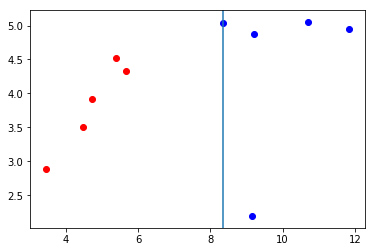

In [150]:
plt.scatter(toy_data_pd.x1[toy_data_pd.class_id == 0], toy_data_pd.x2[toy_data_pd.class_id == 0], c='r')
plt.scatter(toy_data_pd.x1[toy_data_pd.class_id == 1], toy_data_pd.x2[toy_data_pd.class_id == 1], c='b')
# If split on X1, uncomment next line.
plt.axvline(x=split['value'])
# If split on X2, uncomment next line.
# plt.axhline(y=split['value'])
plt.show()